# Healthcare Data Analysis – 20 Exercises Workbook



This notebook follows a structured template for each task:

**Exercise → Purpose → Concepts → Code → Expected Output → Business Insight**

> Tip: Run cells one by one, document observations, and keep insights short and actionable.


## Setup

Update the path to your dataset if needed. The notebook assumes a CSV with the following columns (adjust as necessary):

- `Date of Admission` (string or datetime)
- `Discharge Date` (string or datetime)
- `Age` (numeric)
- `Gender` (categorical)
- `Medical Condition` (categorical)
- `Hospital` (categorical)
- `Billing Amount` (numeric)

We'll also create a `Department` column from `Medical Condition` as in your original workflow.


In [ ]:
from google.colab import files

# Upload file (will open a file selector)
uploaded = files.upload()

Saving healthcare_dataset.csv to healthcare_dataset (1).csv


In [ ]:
# Core imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optional: set display options for wider tables
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)

# Load dataset (update the path/filename if needed)
DATA_PATH = "healthcare_dataset.csv"  # <- change if your file is named differently
df = pd.read_csv(DATA_PATH)

# Map Medical Condition -> Department (adjust mapping for your data)
condition_to_dept = {
    'Obesity': 'Cardiology',
    'Hypertension': 'Cardiology',
    'Arthritis': 'Orthopedics',
    'Cancer': 'Oncology',
    'Diabetes': 'Endocrinology',
    'Asthma': 'Pulmonology'
}
df['Department'] = df['Medical Condition'].map(condition_to_dept)

# Ensure date columns are parsed where relevant throughout the notebook

## Exercise 1: Load dataset and show first 10 rows

**Purpose:** Verify the data loaded correctly and inspect basic structure/values.

**Concepts Used:** Pandas (read_csv, head)

In [ ]:
# Show the first 10 rows
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Department
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Oncology
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Cardiology
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Cardiology
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Endocrinology
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,Oncology
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal,Pulmonology
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive,Endocrinology
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive,Oncology
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal,Pulmonology
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive,Oncology


**Expected Output:** A table with the first 10 rows of the dataset.

**Business Insight:** Validate columns, spot obvious issues (e.g., strange values or formats).

## Exercise 2: Show dataset shape, columns, and dtypes

**Purpose:** Understand scale and structure before cleaning/transformations.

**Concepts Used:** Pandas (shape, columns, dtypes, info)

In [ ]:
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
# Optional detailed info
df.info()

Dataset Shape: (55500, 16)

Columns:
 ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results', 'Department']

Data Types:
 Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
Department             object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nam

**Expected Output:** Printed shape, list of columns, and data types.

**Business Insight:** Confirms expected columns and where type conversions may be needed.

## Exercise 3: Filter rows: Patients admitted to Cardiology

**Purpose:** Isolate a department to analyze load, utilization, or outcomes.

**Concepts Used:** Boolean indexing (DataFrame filtering)

In [ ]:
cardiology_df = df[df['Department'] == 'Cardiology']
cardiology_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Department
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Cardiology
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Cardiology
11,aaRon MARtiNeZ,38,Female,A-,Hypertension,2023-08-13,Douglas Mayo,Lyons-Blair,Medicare,7999.586880,288,Urgent,2023-09-05,Lipitor,Inconclusive,Cardiology
15,MS. nAtalIE gAMble,46,Female,AB-,Obesity,2023-01-01,Maria Dougherty,Cline-Williams,Blue Cross,12263.357425,465,Elective,2023-01-11,Aspirin,Inconclusive,Cardiology
17,mRS. jamiE cAMPBELl,38,Male,AB-,Obesity,2020-03-08,Justin Kim,"Torres, and Harrison Jones",Cigna,17440.465444,449,Urgent,2020-04-02,Paracetamol,Abnormal,Cardiology


**Expected Output:** A filtered table containing only Cardiology patients.

**Business Insight:** Understand department-specific counts and downstream metrics.

## Exercise 4: Sort patients by admission date

**Purpose:** Analyze chronology and seasonality of admissions.

**Concepts Used:** Datetime parsing, sort_values

In [ ]:
# Ensure datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')

# Sort by admission date
datesort_df = df.sort_values(by='Date of Admission', ascending=True).copy()
datesort_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Department
13872,DAniELLe arelLANO,38,Female,O-,Obesity,2019-05-08,Kevin Williamson,PLC Diaz,Blue Cross,30663.337360,253,Emergency,2019-06-04,Aspirin,Normal,Cardiology
25568,AdAM HeRNandEZ,46,Female,B-,Hypertension,2019-05-08,Kristopher Rosales,Bailey-Herman,Blue Cross,9379.010120,356,Emergency,2019-05-30,Paracetamol,Abnormal,Cardiology
36249,AnGELa GrEEn,68,Male,A-,Arthritis,2019-05-08,Diane Foster,PLC Miller,Cigna,18802.678609,346,Emergency,2019-06-03,Aspirin,Abnormal,Orthopedics
35733,JOHN WARD,56,Female,A-,Cancer,2019-05-08,Jacqueline Fields,"and Lam Reyes, Smith",Blue Cross,12090.525600,431,Elective,2019-05-15,Lipitor,Inconclusive,Oncology
8991,cHriSTOpHer bArAJAS,49,Male,B+,Obesity,2019-05-08,Stephanie Tran,PLC Mathis,Medicare,35344.934202,285,Elective,2019-06-01,Lipitor,Normal,Cardiology


**Expected Output:** Top rows sorted by earliest admission dates.

**Business Insight:** Useful for time-series analysis and building monthly/seasonal views.

## Exercise 5: Check missing values per column

**Purpose:** Quantify data quality issues before deciding on cleaning strategies.

**Concepts Used:** isnull, sum

In [ ]:
missing_values = datesort_df.isnull().sum()
missing_values

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


**Expected Output:** A Series of columns with corresponding missing counts.

**Business Insight:** Highlights which fields require imputation or case-wise deletion.

## Exercise 6: Fill missing values (Age with mean)

**Purpose:** Impute missing values to preserve records and reduce bias.

**Concepts Used:** fillna, mean, inplace updates

In [ ]:
# Fill missing Age with the mean age (rounded)
age_mean = datesort_df['Age'].mean(skipna=True)
datesort_df['Age'] = datesort_df['Age'].fillna(round(age_mean, 0))
datesort_df['Age'].head()

,Age
13872,38
25568,46
36249,68
35733,56
8991,49


**Expected Output:** Age column without NaNs; values imputed to the mean.

**Business Insight:** Keeps sample size high; note potential bias introduced by imputation.

## Exercise 7: Remove duplicates

**Purpose:** Ensure each patient record is unique to avoid double counting.

**Concepts Used:** duplicated, drop_duplicates

In [ ]:
before = len(datesort_df)
datesort_df = datesort_df.drop_duplicates().copy()
after = len(datesort_df)
print(f"Removed {before - after} duplicate rows.")

Removed 534 duplicate rows.


**Expected Output:** Printed summary of removed duplicates.

**Business Insight:** Prevents inflated counts and skewed statistics.

## Exercise 8: Group data: Number of patients by diagnosis

**Purpose:** Assess case mix and top conditions treated.

**Concepts Used:** groupby, size/value_counts

In [ ]:
patients_by_dx = datesort_df.groupby('Medical Condition').size().sort_values(ascending=False)
patients_by_dx.head(10)

,0
Medical Condition,
Arthritis,9218
Diabetes,9216
Hypertension,9151
Obesity,9146
Cancer,9140
Asthma,9095


**Expected Output:** A frequency table of medical conditions, sorted by count.

**Business Insight:** Identify high-volume conditions driving demand and resource allocation

## Exercise 9: Create new column: Length of Stay = Discharge Date – Admission Date

**Purpose:** Quantify utilization and efficiency of hospital stays.

**Concepts Used:** Datetime arithmetic, timedelta, dt.days

In [ ]:
datesort_df['Discharge Date'] = pd.to_datetime(datesort_df['Discharge Date'], errors='coerce')
datesort_df['Length of Stay'] = (datesort_df['Discharge Date'] - datesort_df['Date of Admission']).dt.days
datesort_df[['Date of Admission', 'Discharge Date', 'Length of Stay']].head()

,Date of Admission,Discharge Date,Length of Stay
13872,2019-05-08,2019-06-04,27
25568,2019-05-08,2019-05-30,22
36249,2019-05-08,2019-06-03,26
35733,2019-05-08,2019-05-15,7
8991,2019-05-08,2019-06-01,24


**Expected Output:** A new numeric column 'Length of Stay' in days.

**Business Insight:** Core KPI for hospital operations and cost analysis.

## Exercise 10: Convert admission date to datetime and extract month/year

**Purpose:** Enable time-based aggregations and seasonal analysis.

**Concepts Used:** to_datetime, dt.month, dt.year, dt.strftime

In [ ]:
datesort_df['Admission_Month'] = datesort_df['Date of Admission'].dt.month
datesort_df['Admission_Month_Name'] = datesort_df['Date of Admission'].dt.strftime('%B')
datesort_df['Admission_Year'] = datesort_df['Date of Admission'].dt.year
datesort_df[['Date of Admission', 'Admission_Month', 'Admission_Month_Name', 'Admission_Year']].head()

,Date of Admission,Admission_Month,Admission_Month_Name,Admission_Year
13872,2019-05-08,5,May,2019
25568,2019-05-08,5,May,2019
36249,2019-05-08,5,May,2019
35733,2019-05-08,5,May,2019
8991,2019-05-08,5,May,2019


**Expected Output:** Additional columns for month and year.

**Business Insight:** Facilitates monthly/annual trends and seasonality checks.

## Exercise 11: Find top 5 hospitals by patient count

**Purpose:** Identify high-throughput facilities for capacity planning.

**Concepts Used:** value_counts, head

In [ ]:
top5_hospitals = datesort_df['Hospital'].value_counts().head(5)
top5_hospitals

,count
Hospital,
LLC Smith,44
Ltd Smith,39
Smith Ltd,37
Johnson PLC,37
Smith Group,36


**Expected Output:** A Series of top 5 hospitals and their counts.

**Business Insight:** Targets for operational improvements or deeper analysis.

## Exercise 12: Pivot table: Patients per department per month

**Purpose:** Understand seasonal department load for staffing and planning.

**Concepts Used:** pivot_table (aggfunc='size')

In [ ]:
pivot_table = pd.pivot_table(
    datesort_df,
    index='Department',
    columns='Admission_Month_Name',
    aggfunc='size',
    fill_value=0
)

styled = pivot_table.style.background_gradient(cmap="cividis")
styled

Admission_Month_Name,April,August,December,February,January,July,June,March,May,November,October,September
Department,,,,,,,,,,,,
Cardiology,1478,1564,1597,1368,1520,1569,1515,1546,1579,1484,1580,1497
Endocrinology,777,747,740,700,780,821,829,762,735,786,797,742
Oncology,755,815,752,698,723,773,753,802,757,783,772,757
Orthopedics,723,840,797,744,791,819,757,739,764,754,753,737
Pulmonology,745,819,731,700,841,783,796,773,720,701,711,775


**Expected Output:** A department x month matrix with counts.

**Business Insight:** Highlights peak months per department for resource alignment. Cardiology must be allocated more resources; Pulmonology has least patients.

## Exercise 13: Correlation matrix: Age, Length of Stay, Billing Amount

**Purpose:** Explore linear relationships among key numerical variables.

**Concepts Used:** corr

In [ ]:
corr_matrix = datesort_df[['Age','Length of Stay','Billing Amount']].corr()
corr_matrix

,Age,Length of Stay,Billing Amount
Age,1.000000,0.007890,-0.003427
Length of Stay,0.007890,1.000000,-0.004891
Billing Amount,-0.003427,-0.004891,1.000000


**Expected Output:** 3x3 correlation matrix.

**Business Insight:** No strong correlations were found between Age, Length of Stay, and Billing Amount. This suggests hospital charges is likely influenced by other factors.

## Exercise 14: Visualization: Top 10 diagnoses by patient count (bar chart)

**Purpose:** Visualize the most common conditions to guide resource focus.

**Concepts Used:** value_counts, plot(kind='bar'), matplotlib

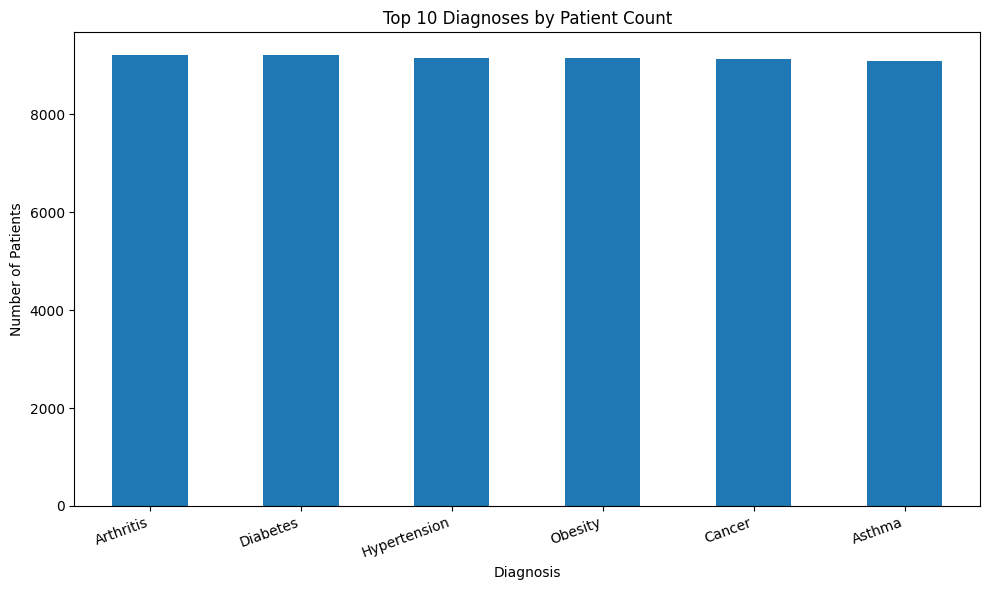

In [ ]:
top_diagnoses = datesort_df['Medical Condition'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_diagnoses.plot(kind='bar')
plt.title('Top 10 Diagnoses by Patient Count')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

**Expected Output:** A bar chart of the top diagnoses.

**Business Insight:** Spot high-volume diagnoses; align staffing, beds, and equipment accordingly.

## Exercise 15: Complex EDA: Monthly patient admissions trend (line chart)

**Purpose:** Reveal seasonal patterns and anomalies in admissions.

**Concepts Used:** groupby, size, line plot

Admission_Month
1     4655
2     4210
3     4622
4     4478
5     4555
6     4650
7     4765
8     4785
9     4508
10    4613
11    4508
12    4617
dtype: int64


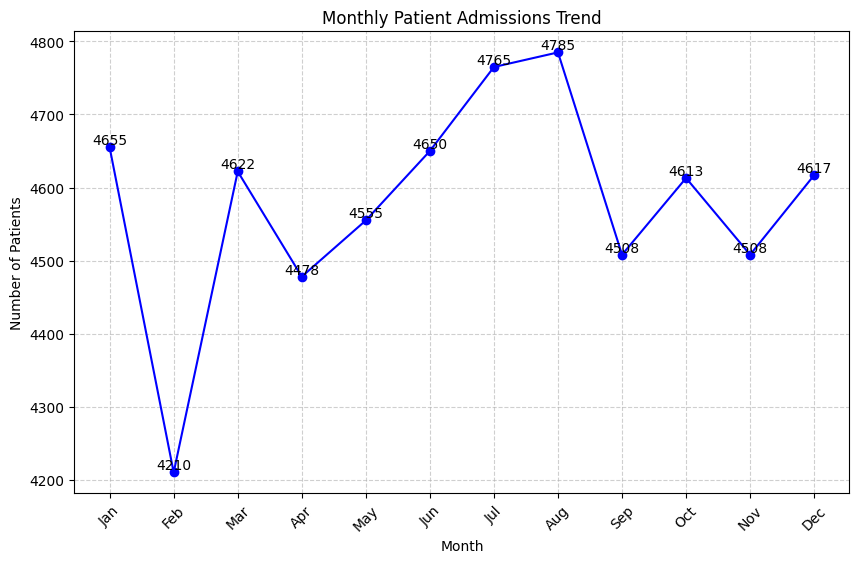

In [ ]:
import calendar

monthly_trend = datesort_df.groupby("Admission_Month").size()

print(monthly_trend)
plt.figure(figsize=(10,6))

# Line chart
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='b')

# Add labels for each point
for x, y in zip(monthly_trend.index, monthly_trend.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Format axes
plt.title("Monthly Patient Admissions Trend")
plt.xlabel("Month")
plt.ylabel("Number of Patients")
plt.xticks(ticks=range(1,13), labels=calendar.month_abbr[1:13], rotation=45)  # Jan–Dec
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

**Expected Output:** A line chart showing monthly admissions over time.

**Business Insight:** Patient admissions peak in January and May, with a low in March, suggesting seasonal factors and the need for adaptive staffing.

## Exercise 16: Age Distribution (Histogram)

**Purpose:** Understand which age groups are most admitted.

**Concepts Used:** histogram, matplotlib

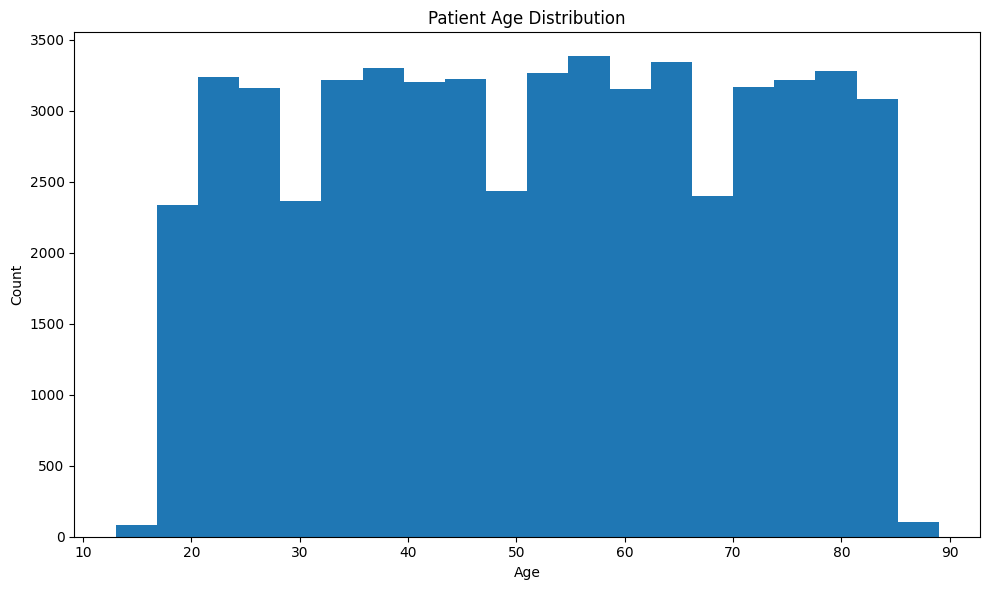

In [ ]:
plt.figure(figsize=(10, 6))
datesort_df['Age'].dropna().plot(kind='hist', bins=20)
plt.title('Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Expected Output:** A histogram of patient ages.

**Business Insight:** Target age-specific interventions or screening programs.

## Exercise 17: Charges by Department (Box Plot)

**Purpose:** Compare billing variation across departments and detect outliers.

**Concepts Used:** matplotlib boxplot

/tmp/ipython-input-3875036429.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped, labels=labels, showfliers=True)


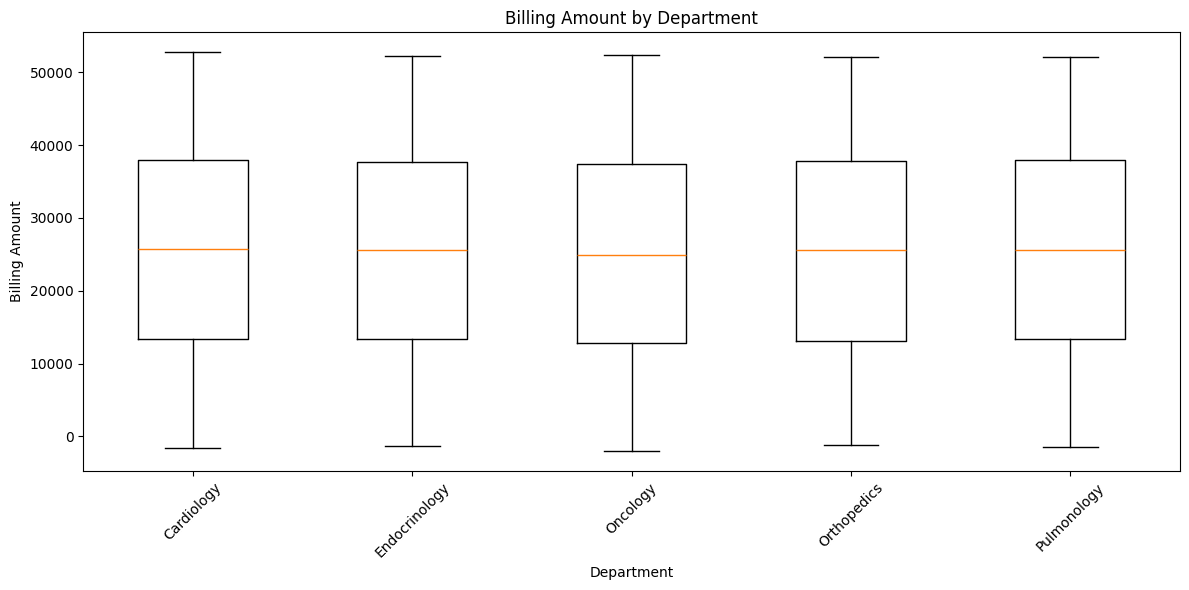

In [ ]:
# Prepare data for boxplot
grouped = [g['Billing Amount'].dropna().values for _, g in datesort_df.groupby('Department')]
labels = [dept for dept, _ in datesort_df.groupby('Department')]

plt.figure(figsize=(12, 6))
plt.boxplot(grouped, labels=labels, showfliers=True)
plt.title('Billing Amount by Department')
plt.xlabel('Department')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Expected Output:** A box plot comparing billing per department.

**Business Insight:** Departments with wider IQR/whiskers show higher cost variability.

## Exercise 18: Gender Breakdown (Pie Chart)

**Purpose:** Check patient gender distribution for equity and outreach.

**Concepts Used:** value_counts, pie chart

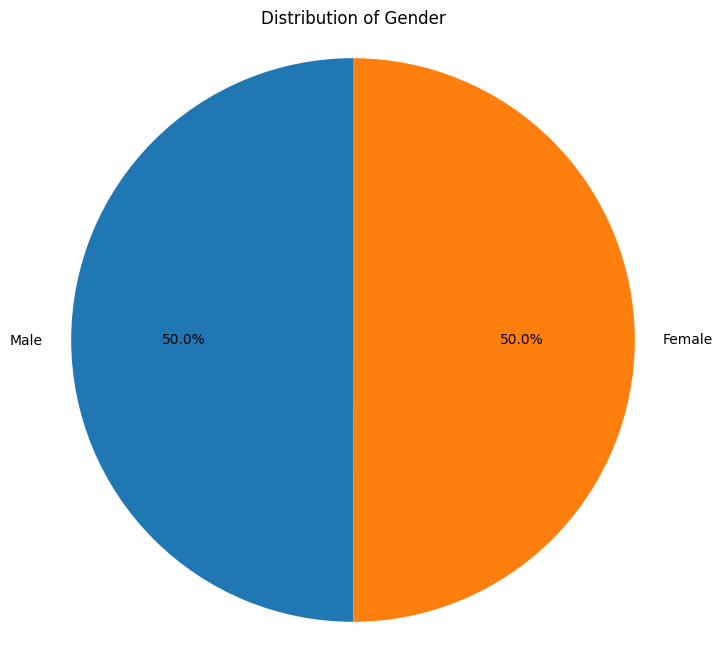

In [ ]:
gender_counts = datesort_df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

**Expected Output:** A pie chart of gender distribution.

**Business Insight:** Confirms balance or highlights outreach gaps in specific groups.

## Exercise 19: Trend Analysis Over Time (Line Plot)

**Purpose:** Track admissions over time as a second check (alternative view).

**Concepts Used:** groupby, resample via period, matplotlib line

/tmp/ipython-input-375180212.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = ts_df['Hospital'].resample('M').size()


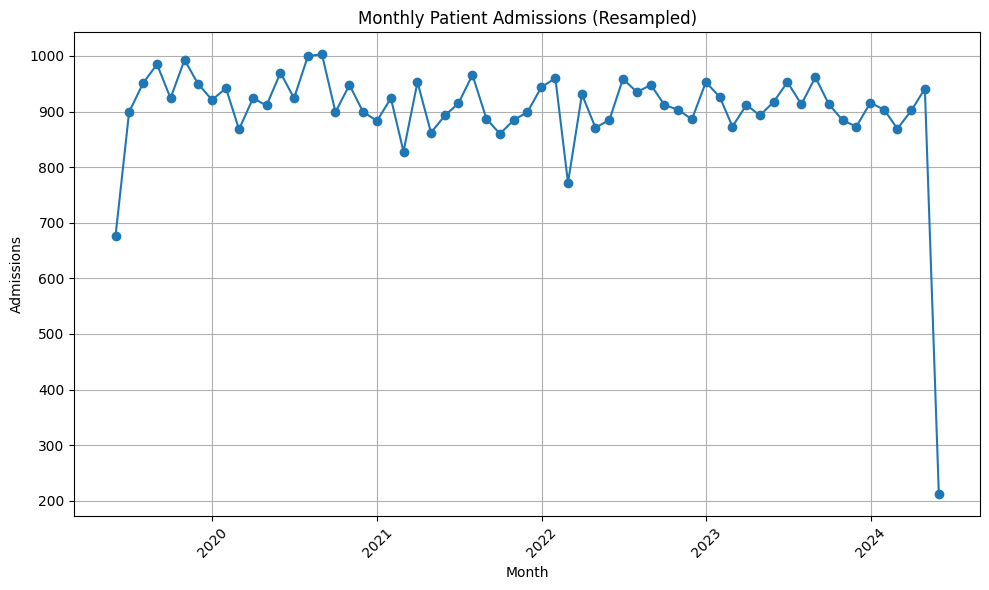

In [ ]:
# Alternative monthly series using resample (requires a DatetimeIndex)
ts_df = datesort_df.set_index('Date of Admission').sort_index()
monthly_counts = ts_df['Hospital'].resample('M').size()
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Monthly Patient Admissions (Resampled)')
plt.xlabel('Month')
plt.ylabel('Admissions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Expected Output:** A monthly resampled admissions chart.

**Business Insight:** Patient admissions were stable from 2019 to 2024, but a sudden, dramatic drop in late 2024 requires urgent investigation

## Exercise 20: Heatmap (Correlation Visualization)

**Purpose:** Visualize correlations among Age, Length of Stay, Billing Amount.

**Concepts Used:** pandas corr + matplotlib imshow with annotations

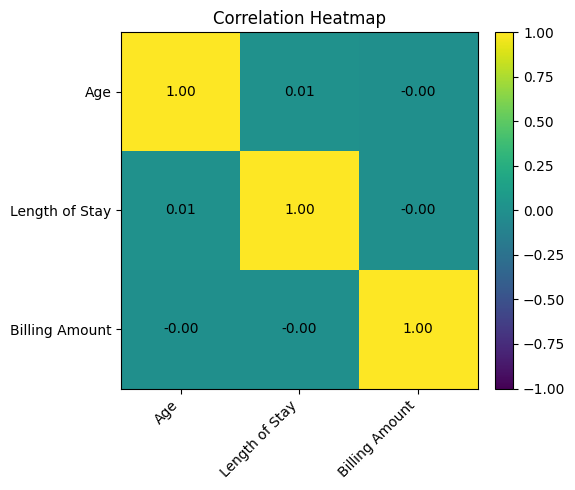

In [ ]:
import numpy as np

corr = datesort_df[['Age','Length of Stay','Billing Amount']].corr().values
labels = ['Age','Length of Stay','Billing Amount']

plt.figure(figsize=(6, 5))
im = plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.yticks(range(len(labels)), labels)

# add annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, f"{corr[i, j]:.2f}", ha='center', va='center')

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

**Expected Output:** A heatmap with correlation coefficients annotated.

**Business Insight:** correlations are weak, explore additional features (treatment type, insurance, policy).



.